In [2]:
%matplotlib inline
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Select, SelectMultiple,  Layout, Box, Label
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
import umap.umap_ as umap
from ipywidgets import interact, IntSlider, fixed, FloatSlider
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score, precision_recall_fscore_support, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
#поиск всех файлов в папке
files = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('music.csv',), value='music.csv')

In [4]:
df = pd.read_csv(fileselect.value, delimiter=",")
df.columns = df.columns.str.strip()
df.fillna(0)
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [5]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [6]:
select = SelectMultiple(
    options=list(df.columns),
    value=[list(df.columns)[0]],
    description='Параметры: ',
    disabled=False
)

In [7]:
def make_dict(series):
    keys = list(series.value_counts().keys())
    return keys, {keys[i]:i for i in range(len(keys))}

def draw_projections(data, columns):
    fig = plt.figure(figsize=(10, 10))
    proj = '3d' if data.shape[1] == 3 else None
    a = math.ceil(math.sqrt(len(columns)))
    
    for i in range(len(columns)):
        keys, d = make_dict(df[columns[i]])
        colors = [sns.color_palette("husl", len(d))[x] for x in df[columns[i]].map(d)]
        subplot = fig.add_subplot(int(f'{a}{a}{i + 1}'), projection=proj)
        
        if data.shape[1] == 1:
            subplot.scatter(data[:, 0], c=colors)
        elif data.shape[1] == 2:
            subplot.scatter(data[:, 0], data[:, 1], c=colors)
        elif data.shape[1] == 3:
            subplot.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors) 
            
        subplot.title.set_text(f"UMAP projection by {columns[i]}")
            
        patches = [mpatches.Patch(color=sns.color_palette("hls", len(d))[i], label=keys[i]) for i in range(len(keys))]

        subplot.legend(handles=patches, ncol=10, loc="lower center")

In [8]:
def draw_umap(data, columns, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', draw=True):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state=42
    )
    
    result = fit.fit_transform(data)
    
    if draw:
        draw_projections(result, columns)
        plt.title(f"neighbors = {n_neighbors}, min_dist={min_dist}, components={n_components}, metric={metric}")
    
    return result

In [9]:
select

SelectMultiple(description='Параметры: ', index=(0,), options=('Artist Name', 'Track Name', 'Popularity', 'dan…

In [10]:
df = df.dropna()
df_data = df[
        list(select.value)
    ].values
scaled_data = StandardScaler().fit_transform(df_data)


In [11]:
df_data[0]

array([ 5.40000e+01,  3.82000e-01,  8.14000e-01,  3.00000e+00,
       -7.23000e+00,  1.00000e+00,  4.06000e-02,  1.10000e-03,
        4.01000e-03,  1.01000e-01,  5.69000e-01,  1.16454e+02,
        2.51733e+05,  4.00000e+00,  1.00000e+01])

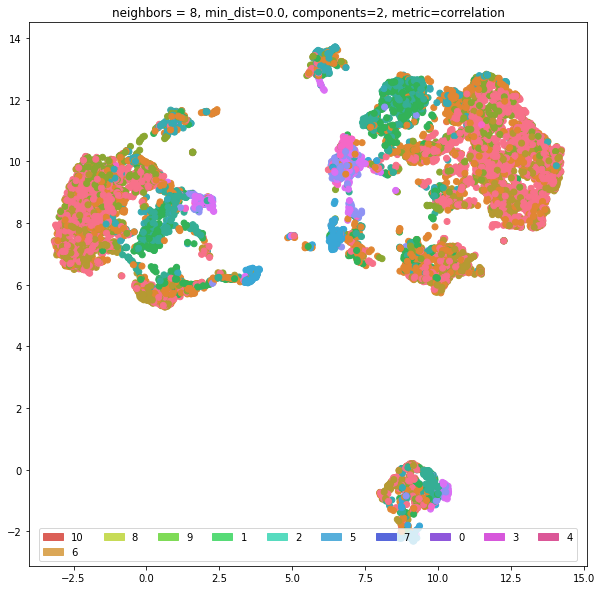

In [12]:
projection = draw_umap(scaled_data, ["Class"], n_neighbors=8, min_dist=0.0, n_components=2, metric='correlation')

In [15]:
keys, d = make_dict(df['Class'])
marks = [x for x in df['Class'].map(d)]


In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_data, marks, test_size=0.2)

In [64]:
knn = KNeighborsClassifier(n_neighbors=11, weights='distance', metric='correlation')
knn.fit(x_train, y_train)
result = knn.predict(x_test)
resultList = result.tolist()

true_count = 0
for i, j in zip(resultList, y_test):
    if i == j: true_count += 1

true_count / len(y_test)

0.5636902242911553

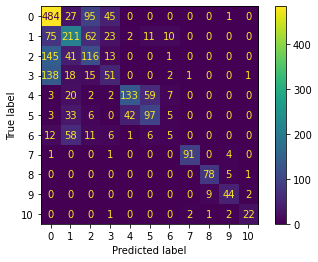

In [65]:
confusionMatrix = plot_confusion_matrix(knn, x_test, y_test) 

In [76]:
precisionScore = precision_score(y_test, result, average='weighted',labels=[7])
precisionScore

0.9680851063829786

In [78]:
recallScore = recall_score(y_test, result, average='weighted')
recallScore

0.5636902242911553

In [79]:
fScore = f1_score(y_test, result, average='weighted')
fScore

0.5487933113520865

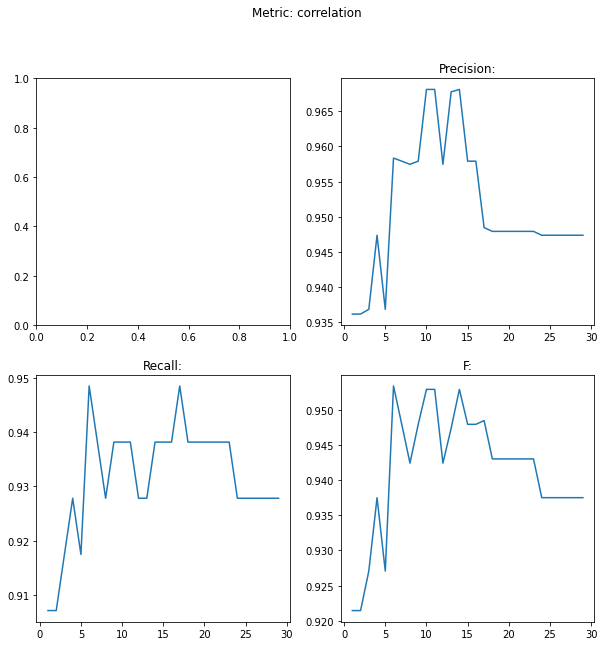

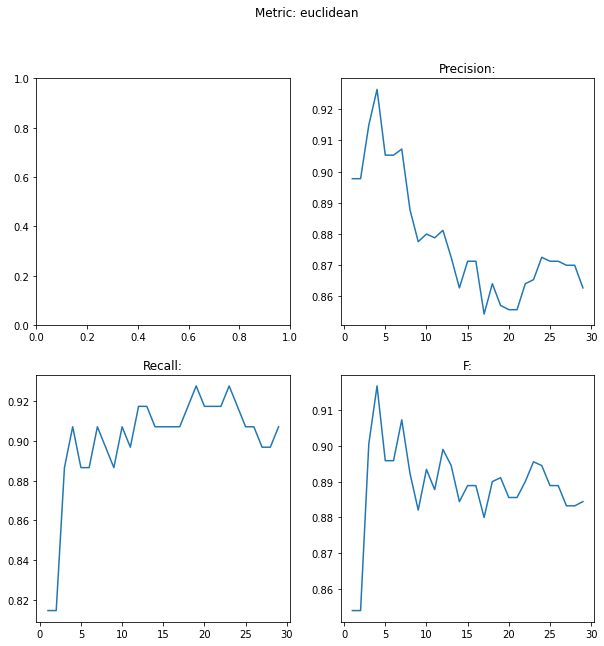

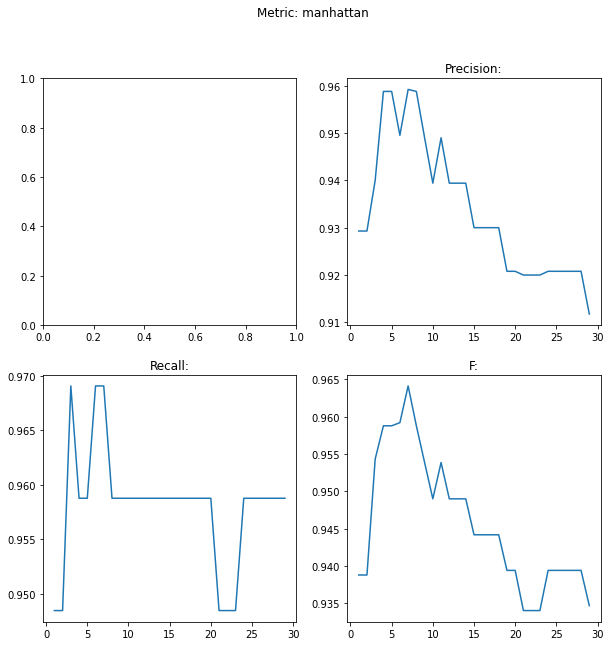

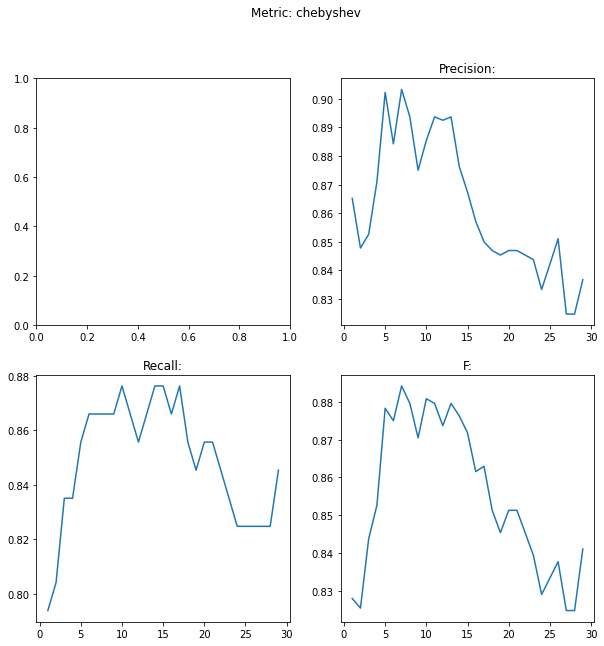

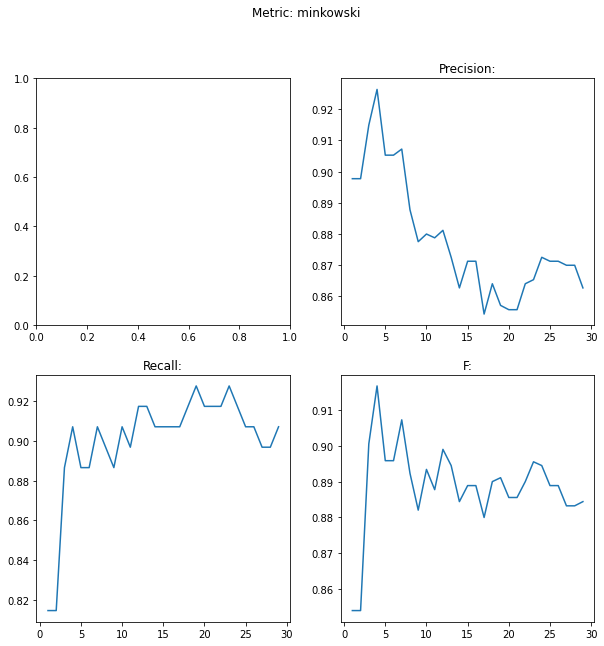

In [84]:
def calc_metrics_for_kneighbors(m):
    acc = []
    prec=[]
    rec = []
    fs = []
    k_range = range(1, 30)

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=m)
        knn.fit(x_train, y_train)
        result = knn.predict(x_test).tolist()

        metrics = precision_recall_fscore_support(y_test, result, labels=[7])
    
        prec.append(np.average(metrics[0]))
        rec.append(np.average(metrics[1]))
        fs.append(np.average(metrics[2]))

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    ax[0][1].plot(k_range, prec)
    ax[1][0].plot(k_range, rec)
    ax[1][1].plot(k_range, fs)

    ax[0][1].set_title("Precision:")
    ax[1][0].set_title("Recall:")
    ax[1][1].set_title("F:")

    fig.suptitle("Metric: " + m)

metrics = ["correlation","euclidean", "manhattan", "chebyshev", "minkowski"]

for m in metrics:
    calc_metrics_for_kneighbors(m)

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

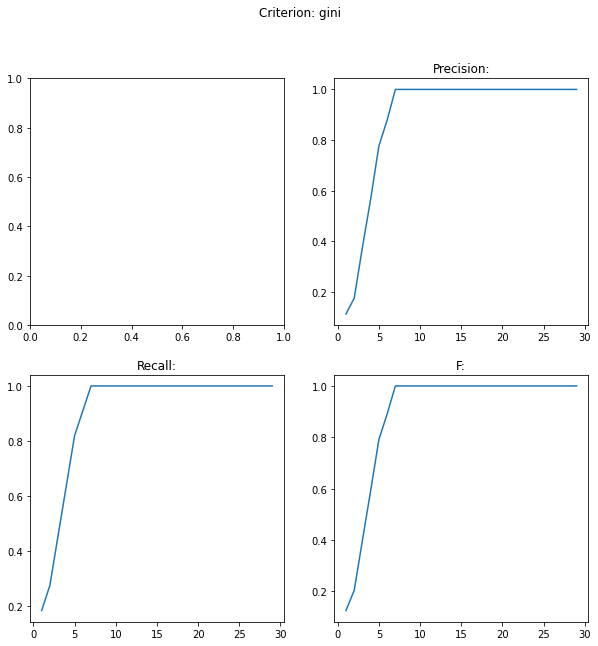

In [88]:
def calc_metrics_for_tree(crit):
    acc = []
    prec=[]
    rec = []
    fs = []
    d_range = range(1, 30)

    for d in d_range:
        knn = DecisionTreeClassifier(criterion=crit, max_depth=d, random_state=42)
        knn.fit(x_train, y_train)
        result = knn.predict(x_test).tolist()

        metrics = precision_recall_fscore_support(y_test, result)
    
        prec.append(np.average(metrics[0]))
        rec.append(np.average(metrics[1]))
        fs.append(np.average(metrics[2]))

    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    ax[0][1].plot(d_range, prec)
    ax[1][0].plot(d_range, rec)
    ax[1][1].plot(d_range, fs)

    ax[0][1].set_title("Precision:")
    ax[1][0].set_title("Recall:")
    ax[1][1].set_title("F:")

    fig.suptitle("Сriterion: " + crit)

calc_metrics_for_tree("gini")

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

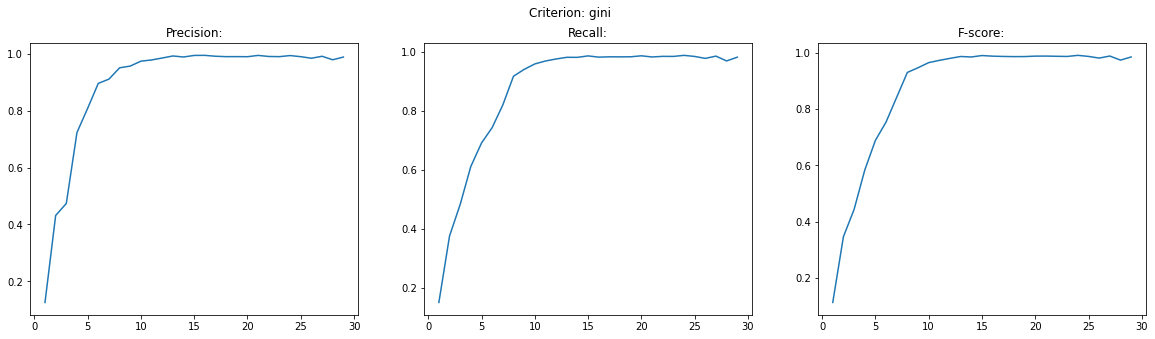

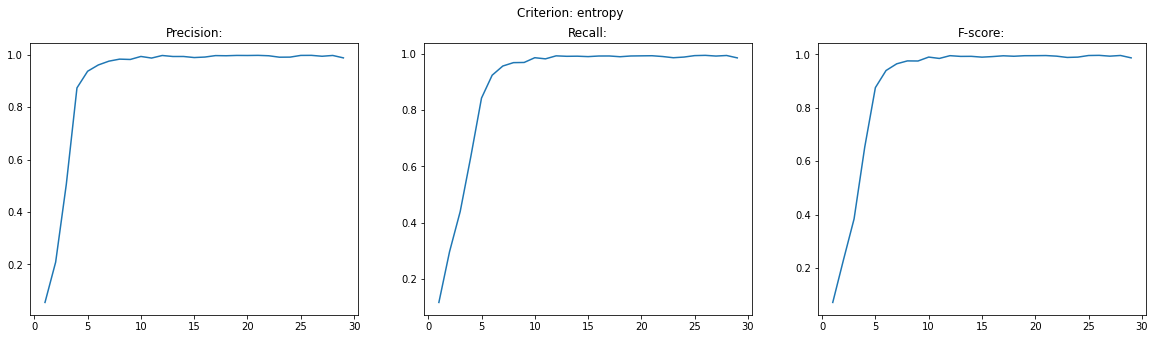

In [89]:
def calc_metrics_for_forest(crit):
    prec=[]
    rec = []
    fs = []
    d_range = range(1, 30)

    for d in d_range:
        knn = RandomForestClassifier(criterion=crit, max_depth=d)
        knn.fit(x_train, y_train)
        result = knn.predict(x_test).tolist()
        metrics = precision_recall_fscore_support(y_test, result)
    
        prec.append(np.average(metrics[0]))
        rec.append(np.average(metrics[1]))
        fs.append(np.average(metrics[2]))

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    ax[0].plot(d_range, prec)
    ax[1].plot(d_range, rec)
    ax[2].plot(d_range, fs)

    ax[0].set_title("Precision:")
    ax[1].set_title("Recall:")
    ax[2].set_title("F-score:")

    fig.suptitle("Сriterion: " + crit)

calc_metrics_for_forest("gini")
calc_metrics_for_forest("entropy")